In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.logging

pint.logging.setup(level="INFO")

1

In [2]:
parfile= "J1534-5334.par"
timfile= "J1534-5334_1.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.914529'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.77189'
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory              ): Using global clock file for gps2utc.clk with bogus_last_correction=False
INFO     (pint.observatory              ): Using global clock file for mo2gps.clk with bogus_last_correction=True
INFO

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57815.7152554776680555 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.046021        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 15:34:08.27909940 (hourangle) +/- 0h00m00.0014609s frozen=False),
    AngleParameter( DECJ                -53:34:19.57857000 (deg) +/- 0d00m00.021243s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  24.82             (pc / cm3) +/- 0.01 pc / cm3 frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DME

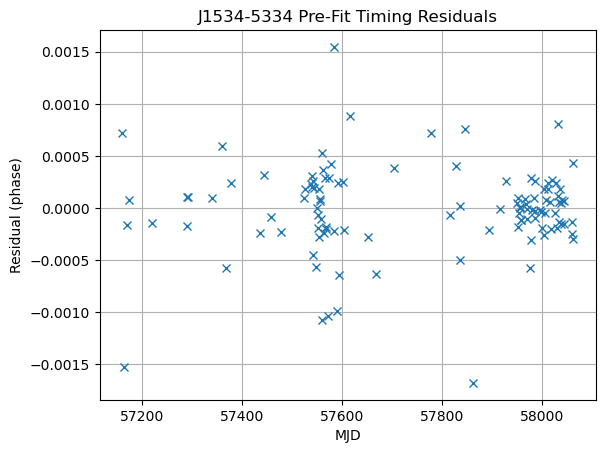

In [3]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [4]:
t_all.print_summary()

Number of TOAs:  113
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57160.577 to 58062.108
Date span: 2015-05-18 13:51:24.298678218 to 2017-11-05 02:35:59.828639885
most TOAs (113):
  Min freq:      833.176 MHz
  Max freq:      840.234 MHz
  Min error:     110 us
  Max error:     3.13e+03 us
  Median error:  317 us



In [6]:
error_ok = t_all.table["error"] <= 300 * u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  52
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57173.559 to 58062.108
Date span: 2015-05-31 13:24:45.229010774 to 2017-11-05 02:35:59.828639885
most TOAs (52):
  Min freq:      834.129 MHz
  Max freq:      840.233 MHz
  Min error:     110 us
  Max error:     299 us
  Median error:  174 us



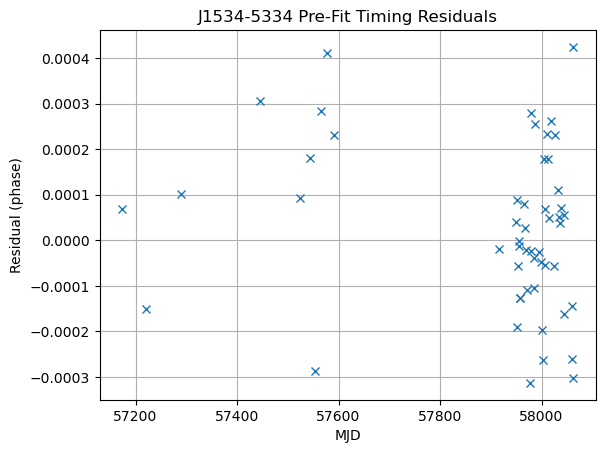

In [7]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [8]:
f = pint.fitter.Fitter.auto(t, m)
f.fit_toas()

INFO     (pint.fitter                   ): For narrowband TOAs without correlated errors and downhill fitter, returning 'DownhillWLSFitter'


In [9]:
f.print_summary()

Fitted model using downhill_wls method with 4 free parameters to 52 TOAs
Prefit residuals Wrms = 232.32414163194835 us, Postfit residuals Wrms = 221.89871750034072 us
Chisq = 98.392 for 47 d.o.f. for reduced Chisq of 2.093

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1534-5334 J1534-5334                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57160.6                      57173.6 d 
FINISH                        58454                      58062.1 d 
DILATEFREQ                        N                              None
DMDATA                            N                              None
NTOA                            231                              None 
CHI2   